In [1]:
from IPython.display import HTML, display, Image
from preprocess import read_preprocess_file
from tables import *
from plots import *
#load in the unmitigated simulation
baseline=read_preprocess_file('./model_outcomes'+'/baseline.csv')

#### Disclaimer: This report is a draft report from AI for Good Simulator on the COVID-19 situation in Moria camp, Lesbos, Greece. The insights are preliminary and they are subject to future model fixes and improvements on parameter values

# AI for Good Simulator Model Report for Moria Camp

## 0. Glossary 
* **hospitalisation/critical care demand person days**: The residents go into the hospitalisation/critical stage signify they require care but they may not receive the care depending on the capacity so this aggregates the hospitalisation/critical demand by person times number of days. If a unit cost of care is known, the total medical expense can be calculated.
* **IQR (interquartile range)**: The output of modelling are represented as Interquartile range representing a confidence interval of 25%-75%.

## 1. Overview

This report provides simulation-based estimates for COVID-19 epidemic scenarios for the Moria camp, one of the largest refugee camps in Europe, located on Lesbos, an island in Greece. There are an estimated 20,000 people currently living in the camp. Through epidemiology simulations, we estimated peak counts, the timing of peak counts as well as cumulative counts for new symptomatic cases, hospitalisation demand person-days, critical care demand person-days and deaths for an unmitigated epidemic.  Then we compare the results with different combinations of intervention strategies in place to:
* Compare the potential efficacies of different interventions and prioritise the ones that are going to help contain the virus.
* Have a realistic estimate of the clinic capacity, PPE, ICU transfer and other supplies and logistical measures needed

The graph below represents the disease transition dynamics for each individual included in the modelling studies. The model we use is a deterministic, age-specific compartment model. We produce the analysis based on 1000 simulation runs over a range of possible parameters


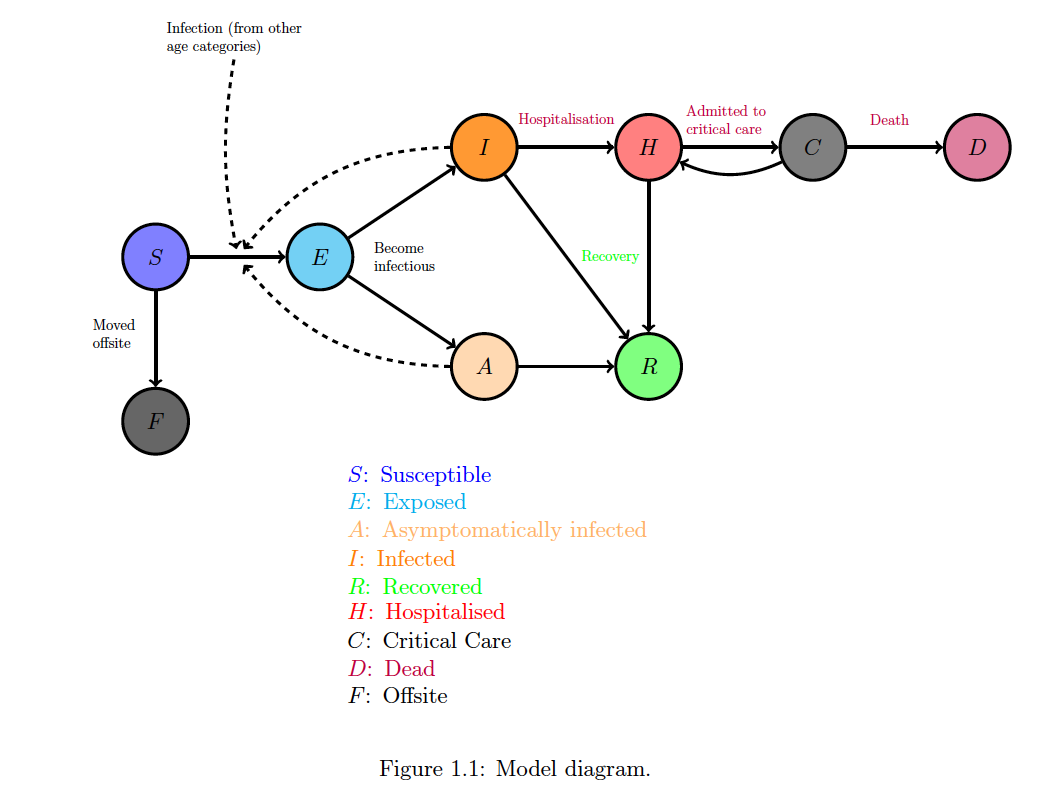

In [2]:
Image(filename='model.png',width=700,height=700) #not the most up-to-date diagram pending an update

The deterministic compartmental model requires:
* Camp specific parameters: population size and age structure of the residents.
* COVID specific parameters*: asymptomatic infection rate, days remaining infectious, etc.


In [3]:
population_breakdown()

Age,Population_structure,Number of residents
0-9,21.1%,3936
10-19,17.3%,3243
20-29,26.4%,4927
30-39,17.2%,3209
40-49,9.2%,1728
50-59,5.5%,1038
60-69,2.5%,475
70+,0.8%,144


In Moria, it is estimated that 65% of the residents are below the age of 30 and that will lead to a relatively low death numbers but a high number of assympomatic infections.

Epidemiology simulations produce peak prevalence, the timing of peak prevalence as well as cumulative incidences for:
* Symptomatic cases of infection
* Hospitalisation demand person-days
* Critical care demand person-days
* Deaths

## 2. Unmitigated COVID-19 Epidemic Trajectory

Here we assume the epidemic spreads through the camp without any non-pharmaceutical intervention in place and the peak incidence (number of cases), the timing and the cumulative case counts are all presented by interquartile range values (25%-75% quantiles) and they respectively represent the optimistic and pessimistic estimates of the spread of the virus given the uncertainty in parameters estimated from epidemiological studies. In the simulations, we explore a range of reproduction numbers, pre-symptomatic duration, rate of recovery, rate of severe infections and death rates based on estimates in the European and Asian settings to nearly what is estimated from a high population density location like a cruise ship. 

In [4]:
prevalence_table_all=prevalence_all_table(baseline);prevalence_table_all

Outcome,Peak Day IQR,Peak Number IQR
Prevalence of Symptomatic Cases,46-68,1422-2228
Hospitalisation Demand,53-76,44-66
Critical Care Demand,55-78,8-10
Prevalence of Deaths,55-79,2-2


The peak number of infections is likely to be in the thousands, easily overwhelming the care capacity of the normal clinics within the camp and this could occur one and a half month after the virus first appears in the camp. The prevalence of hospitalisation, critical condition and death estimated are low: the peak hospitalisation demand will be 40-70 a day and the death estimate is based on the fact the patients require critical care will receive appropriate treatment from the 6 ICU beds that are currently available on Lesbos. The prevalence of death could be as high as the peak critical care demand (8-10) if camp residents are denied treatment at the ICU facility on the island.


In [5]:
prevalence_table_age=prevalence_age_table(baseline);prevalence_table_age

The age breakdown for the peak incidence shows that during the peak infection, residents aged below the age of 40 will comprise of more than 85% of the symptomatic infections while more than half of the people require hospitalisation on any given day will be above the age of 40. Noted that these estimates all project peak of the epidemic to be a month and a half since the first case of COVID19, giving local residents a period of time to react and try to curb the spread of the virus. Noted that the virus could be present in the camp without being noticed until the first death occurrence which is projected to be one month after the virus arrives at the camp.

In [2]:
comulative_table_all=cumulative_all_table(baseline);comulative_table_all

Totals,Counts
Symptomatic Cases,6422-7071
Hospital Person-Days,1742-2158
Critical Person-days,436-497
Deaths,59-68


Looking at the cumulative counts in the course of the simulation spanning 200 days since the arrival of the virus, more than one-third of the camp residents are expected to be symptomatically infected by the virus and the total hospital person-days will be over 1750 person-days which places a huge demand on the hospital. This can be translated into projected medical costs or time required from medical staff if the medical cost and time taken is known for treating one patient for a day.

In [3]:
count_table_age=cumulative_age_table(baseline);count_table_age

The cumulative incidence table for different disease status paints a similar picture compared to the peak prevalence table where younger residents account for most of the symptomatic infections but the older residents account for most of the hospitalisation/critical/death incidences. Most of the cases come from 2-3 months while in the first months the number of symptomatically infected people could range from 100 to 1000.

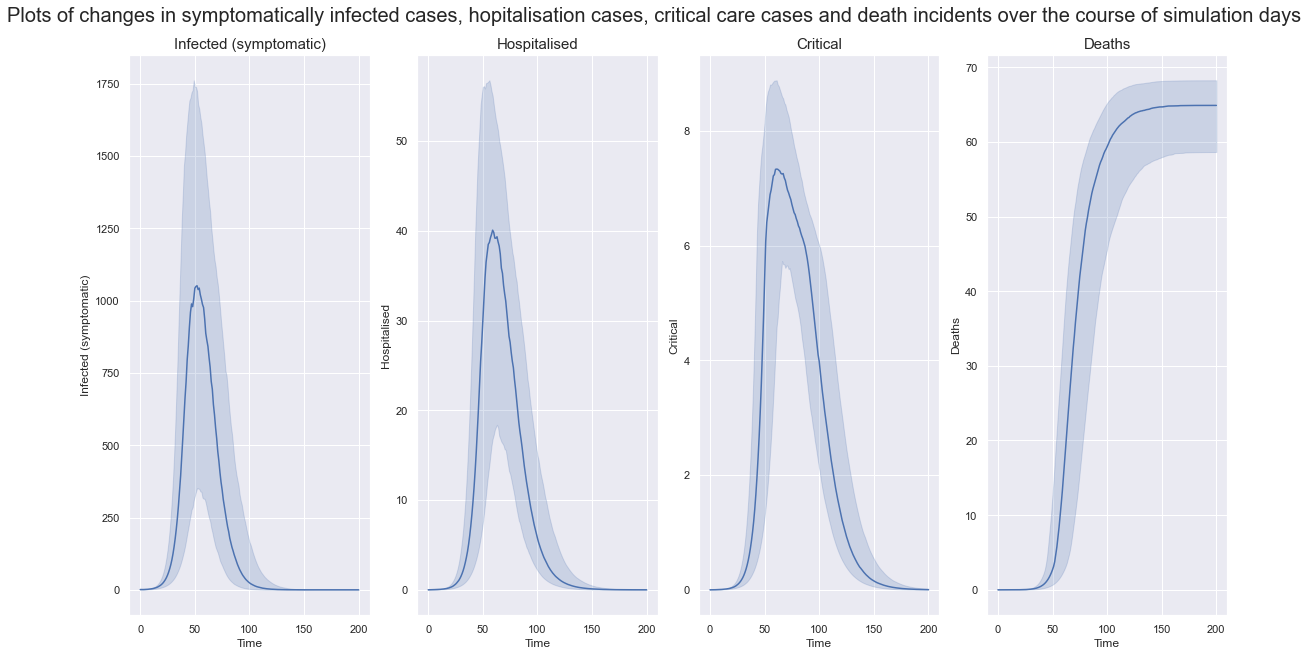

In [2]:
plot_all(baseline)

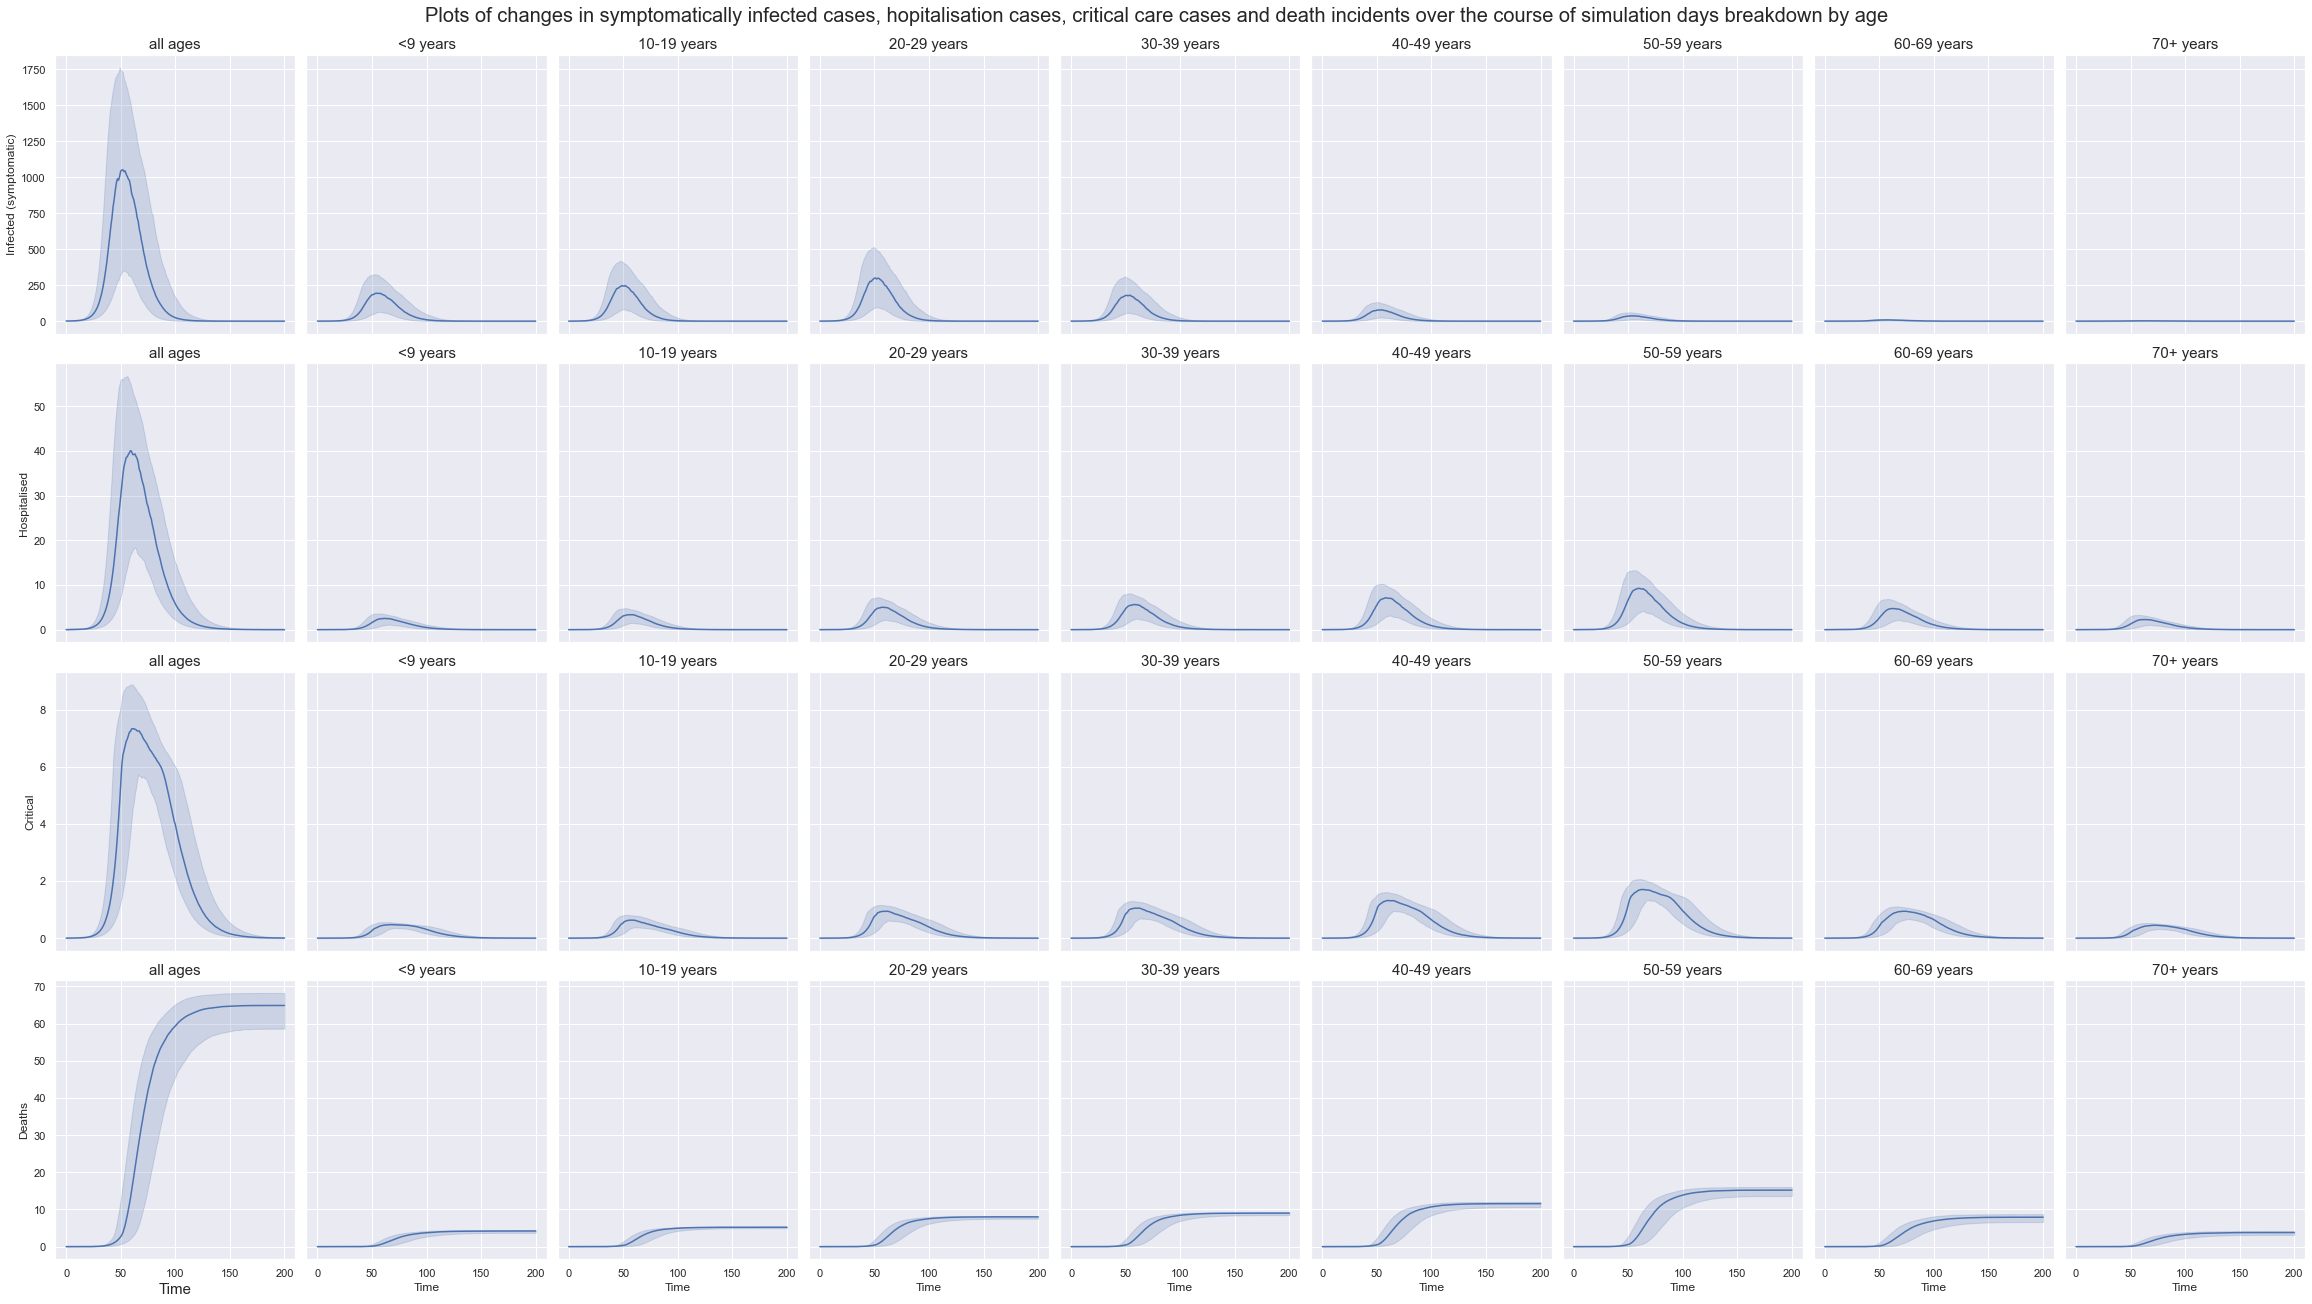

In [3]:
plot_by_age_all(baseline)

Visually comparing different age groups in different disease status, residents of age 50-59 are hit the hardest in terms of hopitatlisation, critical and deaths with residents of age 40-49 second in line. In terms of symptomatic infection, residents of age 20-29 are affected the worst with residents of age 10-19 second in line.

## 2. Invervention scenarios

### 2.1 Single intervention scenarios

We assumed these interventions are applied at the camp-wide level and they are assumed to have full coverage starting from a certain day that is specified by the simulation and there are five interventions that are currently implemented. 

* Improved handwashing, masks for everyone, general social distancing and other interventions that aim to reduce person-to-person transmission probabilities that are not location-specific belongs to this first group of intervention. Here we set the effectiveness of the intervention as anther variable: 10% reduction in transmission rate: somewhat effective, 20% reduction: effective, 30% reduction: very effective.
* Move high-risk residents (age>60) offsite. Here we control the time periods that this is happening and the number of high-risk people being moved off-site each day during that time period.
* Isolate symptomatically infected residents: here we assume the residents are isolated in a separate isolation centre off-site, therefore, the transmission between infected residents in these centres with anyone outside is cut off (we haven't factored in the case where detecting these individuals can have a period of delay and the isolation centres that are currently in place are inside the camp where people still share water points and toilets.)
* Build up ICU bed capacity: we know that on the island of Lesbos there are only 6 ICU beds currently available so we explore the case of building up the ICU beds to 16,32 and 48 to see how that can have an effect. This will only have an impact on the death rate as this won't stop the contagion from spreading within the camp (in reality the ICU bed capacity requirement can be easily tracked through critical cases outlined in the previous section where patients require a treatment package.)
* Shielding: where the high-risk residents (> 60-year-olds) are housed in a green zone in the camp facility and they self-manage the sector while the entry into the green zone is limited so the contact between older residents and younger residents are reduced.

Three high-level insights:
1. Reducing individual-level transmission via social distancing, masks and regular handwashing can result in decreasing up to 20% of all cases in the most optimistic scenario. Prioritising a longer, sustained program is arguably more important than prioritising a short-lived stringent program as it demonstrates that if a program is only effective for 1-2 months, it has minimal effect on curbing the cumulative number of the infectious cases other than delaying the peak infections by a few days.
2. Removing high-risk residents offsite early will not impact the total number of people infected but will reduce the hospitalisation need, critical care need and death incidences onsite by 10%.
3. Isolating symptomatically infected people until they are recovered (still need more investigation and tweaking) currently suggests that the capacity of the isolation centre is less important than having a long and rigorous surveillance program (one such program aims to isolate 10 people per day) (need further tweaking to see how much impact this have on the total number of people infected)


The plot below shows the top 5 single intervention scenarios for reducing peak numbers in each state in descending order:
* Committing to the long-term 'isolation the symptomatically infected people' can help curb the epidemic in all categories and potentially coupled with contact tracing to encourage self-isolation of asymptomatically infected people who are in touch with them can further drive the numbers down.
* Committing to the long-term social distancing/mask/handwashing can help curb the virus tremendously but we need to benchmark the effectiveness of these approaches (possibly by motion tracking or random surveys)
* Removing high-risk residents have a big impact on driving on the death numbers and we have yet to model the effect of removing unaccompanied children off the island.


In [7]:
plot_one_intervention_vertical_interactive(plot_one_intervention_vertical)

interactive(children=(Select(description='Category:', options=('Infected (symptomatic)', 'Hospitalised', 'Crit…

The tables below from each intervention show the % net reduction to cases, deaths, and hospitalised person­days in these scenarios, 200 days after initial introduction in Moria.

### 2.1.1 Improved personal hygiene (social distancing/PPE/regular handwashing)

We are exploring two factors here:
* How effective will the intervention measures have to be the reduce the spread of the virus?
* How long will such measures have to be in place for them to be effective?

In [8]:
effectiveness_cum_table_hygiene(baseline,timing=True)

,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 30,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 60,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 90,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 200
Total,,,,
Symptomatic Cases,0%~0%,1%~2%,5%~7%,9%~21%
Hospital Person-Days,0%~0%,1%~2%,6%~6%,13%~21%
Critical Person-days,0%~0%,-3%~-2%,-5%~-4%,0%~1%
Deaths,0%~0%,2%~3%,8%~10%,13%~29%


Here we explore how the duration of implementing such measures could have an impact on the number of cases reduced and lives saved. Clearly the longer personal hygiene measures are in place the better. Interesting to note that, if these improving hygiene measures are only implemented during the nascent period of the virus (first month) it won't have an impact on the spread of the virus at all. 2 months of applying the measures will yield a minimal reduction in accumulative numbers while implementing for 3+ months can really start yielding promising results in curbing the spread of the virus.

In [2]:
effectiveness_peak_table_hygiene(baseline,timing=True)

Here we explore how such measures can have an impact on the peak incidences and the days in which they occur. Note that a short-lived measure can delay the onset of the epidemic by 10 days while a longer-lasting control measure can delay the epidemic by more than 3 weeks while reducing the peak incidences of symptomatic infections by a third.

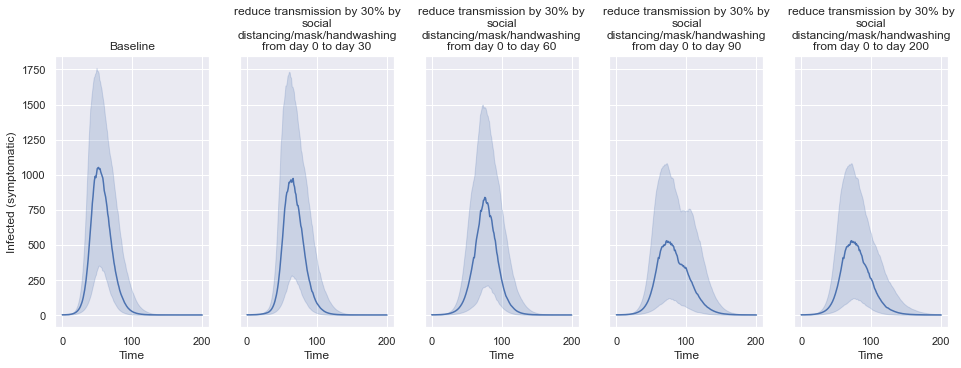

In [3]:
plot_hygiene_intervention_horizontal(baseline)

In [4]:
effectiveness_cum_table_hygiene(baseline,timing=False)

,reduce transmission by 30% by social distancing/mask/handwashing from day 0 to day 200,reduce transmission by 20% by social distancing/mask/handwashing from day 0 to day 200,reduce transmission by 10% by social distancing/mask/handwashing from day 0 to day 200
Total,,,
Symptomatic Cases,9%~21%,5%~11%,2%~5%
Hospital Person-Days,13%~21%,7%~12%,3%~5%
Critical Person-days,0%~1%,-1%~0%,-1%~0%
Deaths,13%~29%,7%~17%,3%~7%


Here we explore how strict these hygiene measures should be and quite rightly so, the better you can do it, the better the results in minimising the impact of the virus. (Further points - how large should the program cover in the total population and what if some people conform and other people disobey social distancing/masks/hand washing)

In [5]:
effectiveness_peak_table_hygiene(baseline,timing=False)

A stricter measure can delay the onset of the epidemic by more than two weeks contrasting with a less strict measure delating onset by only less than a week.

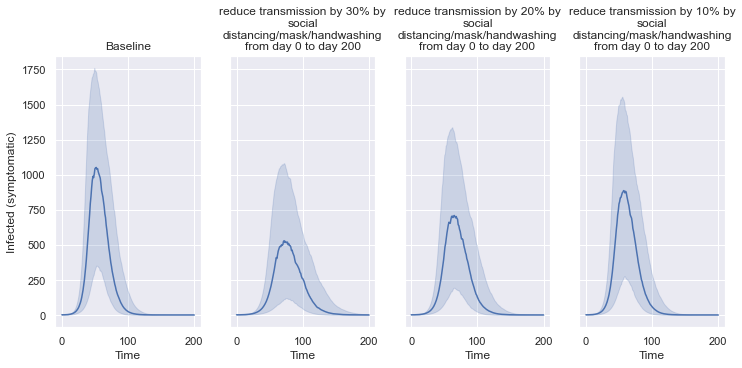

In [6]:
plot_hygiene_intervention_horizontal(baseline,timing=False)

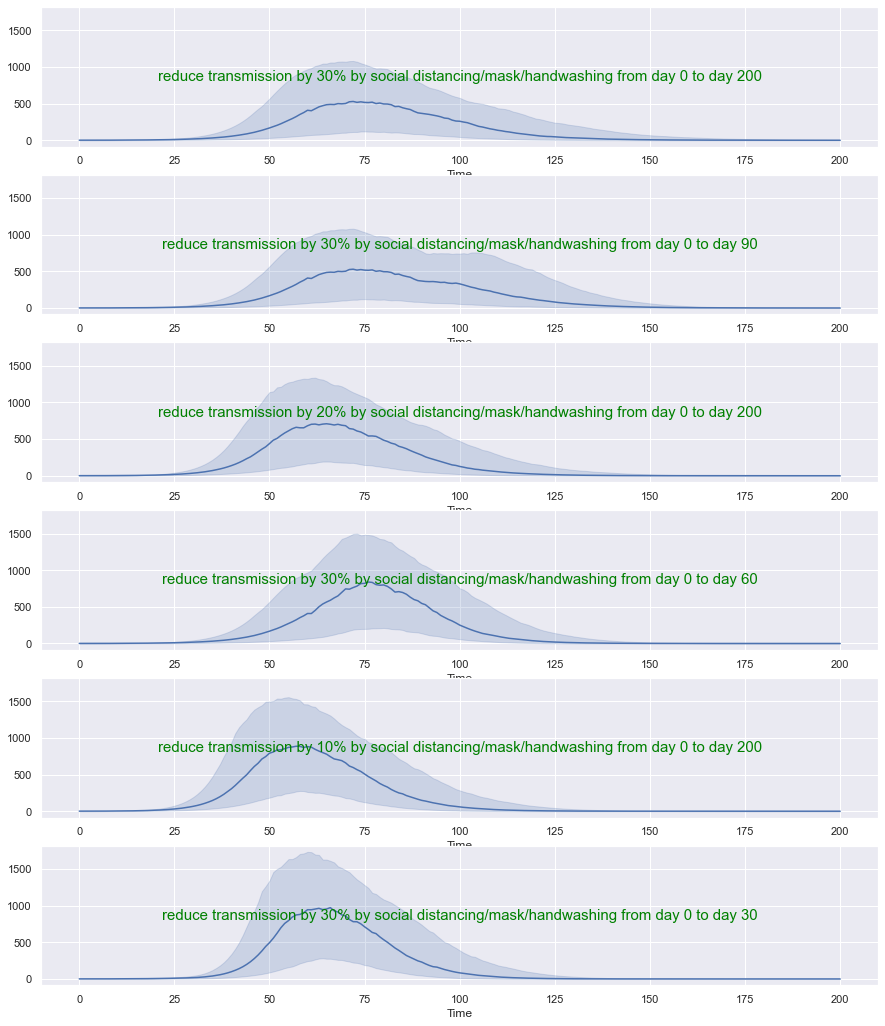

In [8]:
plot_onetype_intervention_vertical('hygiene')

Comparison among the plots (the most effective at the top) shows that prioritising a long-term, sustainable program is more important than having an effective yet short-lived one. There are no quick fixes here!

### 2.1.2 Move high risk residents off-site

Here we assume that there are about 600 residents within the camp who can be classified as high risk (>age 60) so they should go into self-shielding or be moved off-site. We explore removing these residents at a different rate and how that can have an impact on the epidemic. (In reality, this is slowly happening for Moria but the rate of removing these high-risk residents is extremely slow because the authority is evacuating a whole family at a time.

In [10]:
effectiveness_cum_table_onetype(baseline,'highrisk',caption='Effect of removing high risk residents from the camp on cumulative cases of incidence',display=False)

,remove 100 high-risk residents from day 0 to day 6,remove 20 high-risk residents from day 0 to day 30,remove 50 high-risk residents from day 0 to day 12
Total,,,
Symptomatic Cases,-3%~-2%,-3%~-2%,-3%~-2%
Hospital Person-Days,16%~16%,16%~17%,16%~17%
Critical Person-days,9%~10%,10%~10%,10%~10%
Deaths,17%~19%,19%~19%,19%~19%


In [18]:
effectiveness_peak_table_onetype(baseline,'highrisk')

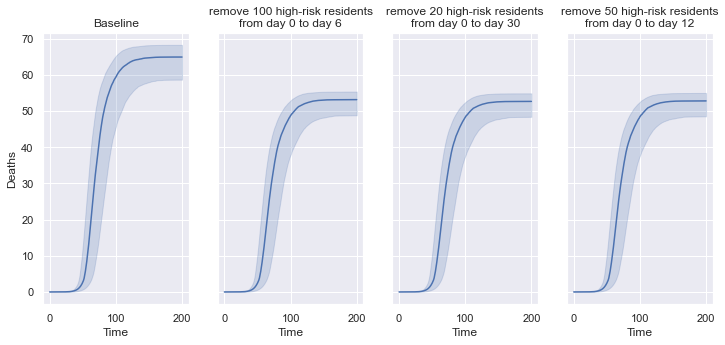

In [13]:
plot_onetype_intervention_horizontal(baseline,'highrisk','Deaths')

Removing high risk residents (age>60) offsite early will not impact the total number of people infected but will reduce the hospitalisation need, critical care need and death incidences onsite by 10-20%. The timing of it does not matter as long as the residents are removed before the peak of the epidemic.

### 2.1.3 Isolate sympotomatically infected residents

Here we explore this intervention along two dimensions:
* the capacity at which we can make sure the infected residents are isolated (5%,10%,20%,35%)
* the detection/isolation rate at which such intervention is carried out (10,50,100 people per day)

In [2]:
cumulative_iso_table()

,Total Qurantined Person-Days
isolate symptomatically infected people at 50 people per day for 120 days,53-3847
isolate symptomatically infected people at 50 people per day for 80 days,42-695
isolate symptomatically infected people at 50 people per day for 40 days,26-97
isolate symptomatically infected people at 50 people per day for 20 days,15-30


The table above shows that the isolation intervention can be quite a resource intensive operation

In [2]:
effectiveness_cum_table_iso(baseline)

,isolate symptomatically infected people at 50 people per day for 20 days,isolate symptomatically infected people at 50 people per day for 40 days,isolate symptomatically infected people at 50 people per day for 80 days,isolate symptomatically infected people at 50 people per day for 120 days
Total,,,,
Symptomatic Cases,0%~0%,0%~0%,0%~1%,2%~24%
Hospital Person-Days,0%~0%,0%~1%,2%~8%,7%~70%
Critical Person-days,0%~1%,2%~3%,4%~12%,9%~76%
Deaths,0%~0%,0%~2%,1%~12%,7%~83%


Notice the high uncertainty for the efficacy of isolating symptomatically infected residents: there can be between 2% to 24% of reduction in cases. It requires that a surveillance program needs to be set up to detect the cases and isolate them as quick as possible while catching most of the cases in any given time

In [16]:
effectiveness_peak_table_iso(baseline)

A successful program can delay the peak of epidemic by more than 2 months time, buying time for other measures to take place more effectively.

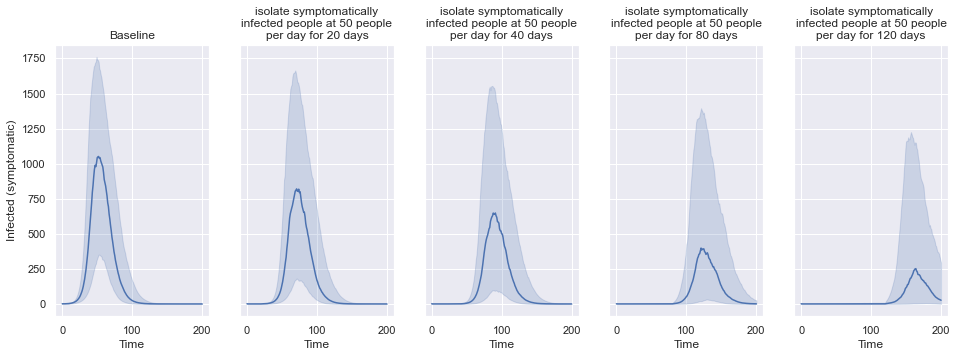

In [2]:
plot_iso_intervention_horizontal(baseline)

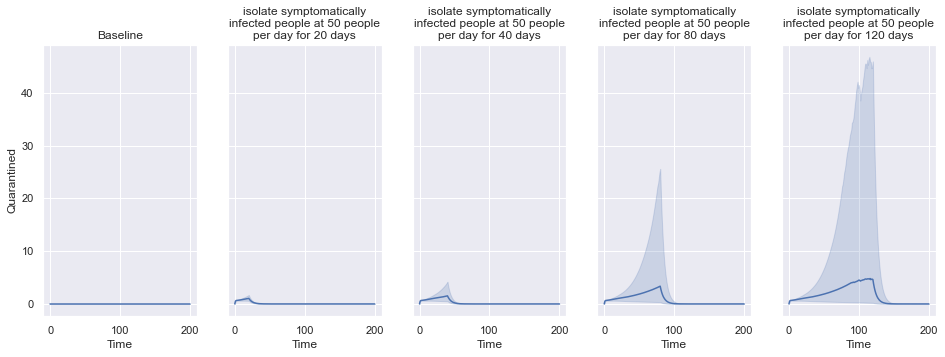

In [3]:
plot_iso_intervention_horizontal(baseline,column='Quarantined')

In [2]:
effectiveness_cum_table_iso(baseline,timing=False)

,isolate symptomatically infected people at 100 people per day for 20 days,isolate symptomatically infected people at 100 people per day for 30 days,isolate symptomatically infected people at 50 people per day for 40 days,isolate symptomatically infected people at 100 people per day for 60 days,isolate symptomatically infected people at 10 people per day for 100 days,isolate symptomatically infected people at 10 people per day for 200 days
Total,,,,,,
Symptomatic Cases,0%~0%,0%~0%,0%~0%,0%~0%,0%~3%,1%~100%
Hospital Person-Days,0%~0%,0%~0%,0%~1%,1%~3%,3%~23%,12%~100%
Critical Person-days,0%~1%,1%~2%,2%~3%,3%~6%,8%~38%,15%~100%
Deaths,0%~0%,0%~2%,0%~2%,0%~3%,1%~32%,4%~100%


The table above shows that for a isolation strategy to work it will have to be carried out for prolonged period of time during the epidemic but the outcome uncertainty is still high (from 1% to 100%).

In [2]:
effectiveness_peak_table_iso(baseline,timing=False)

(The numbers in the last column are negative because in those cases the case numbers have been reduced to 0 so the corresponding peak day is before the peak of the epidemic in the baseline case)

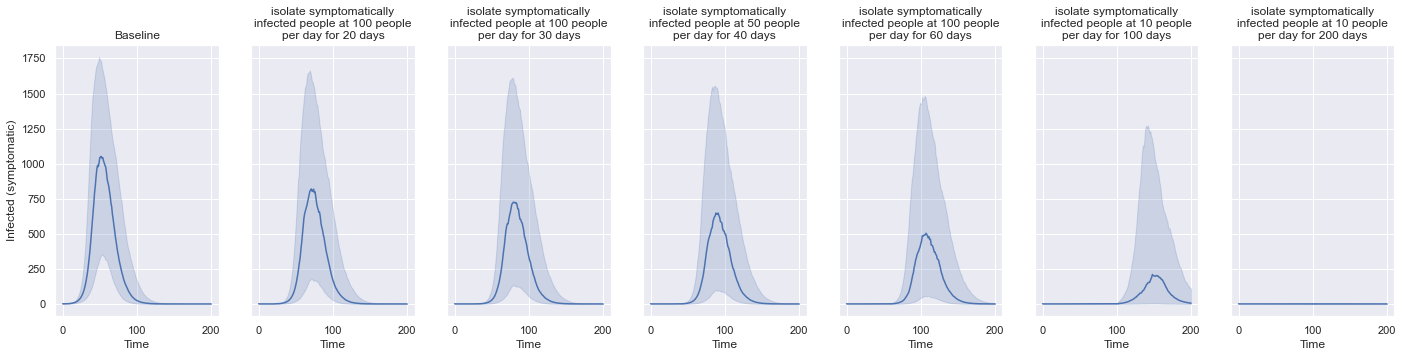

In [2]:
plot_iso_intervention_horizontal(baseline,timing=False)

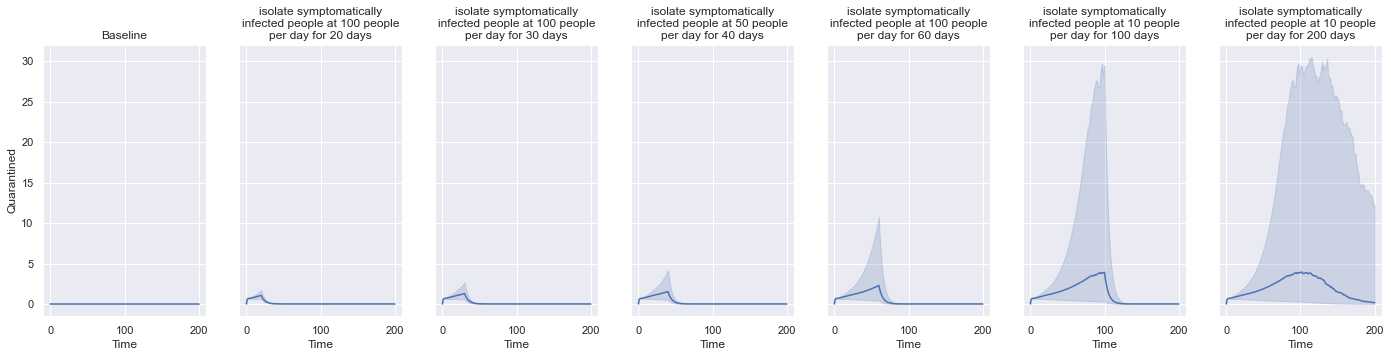

In [3]:
plot_iso_intervention_horizontal(baseline,column='Quarantined',timing=False)

The peak number of people being quarantined here is not big because we have reduced the total number of infections by a dramatic amount and we also assume that our isolation is both specific (identify all the symptomatic cases) and sensitive (only confirmed cases are identified).

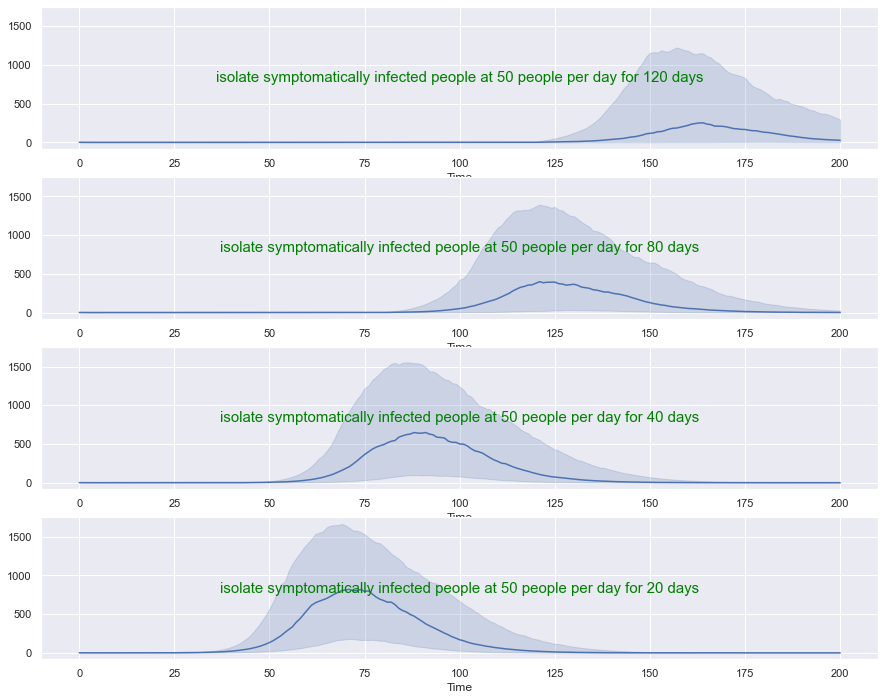

In [4]:
plot_onetype_intervention_vertical('isolate50','Infected (symptomatic)')

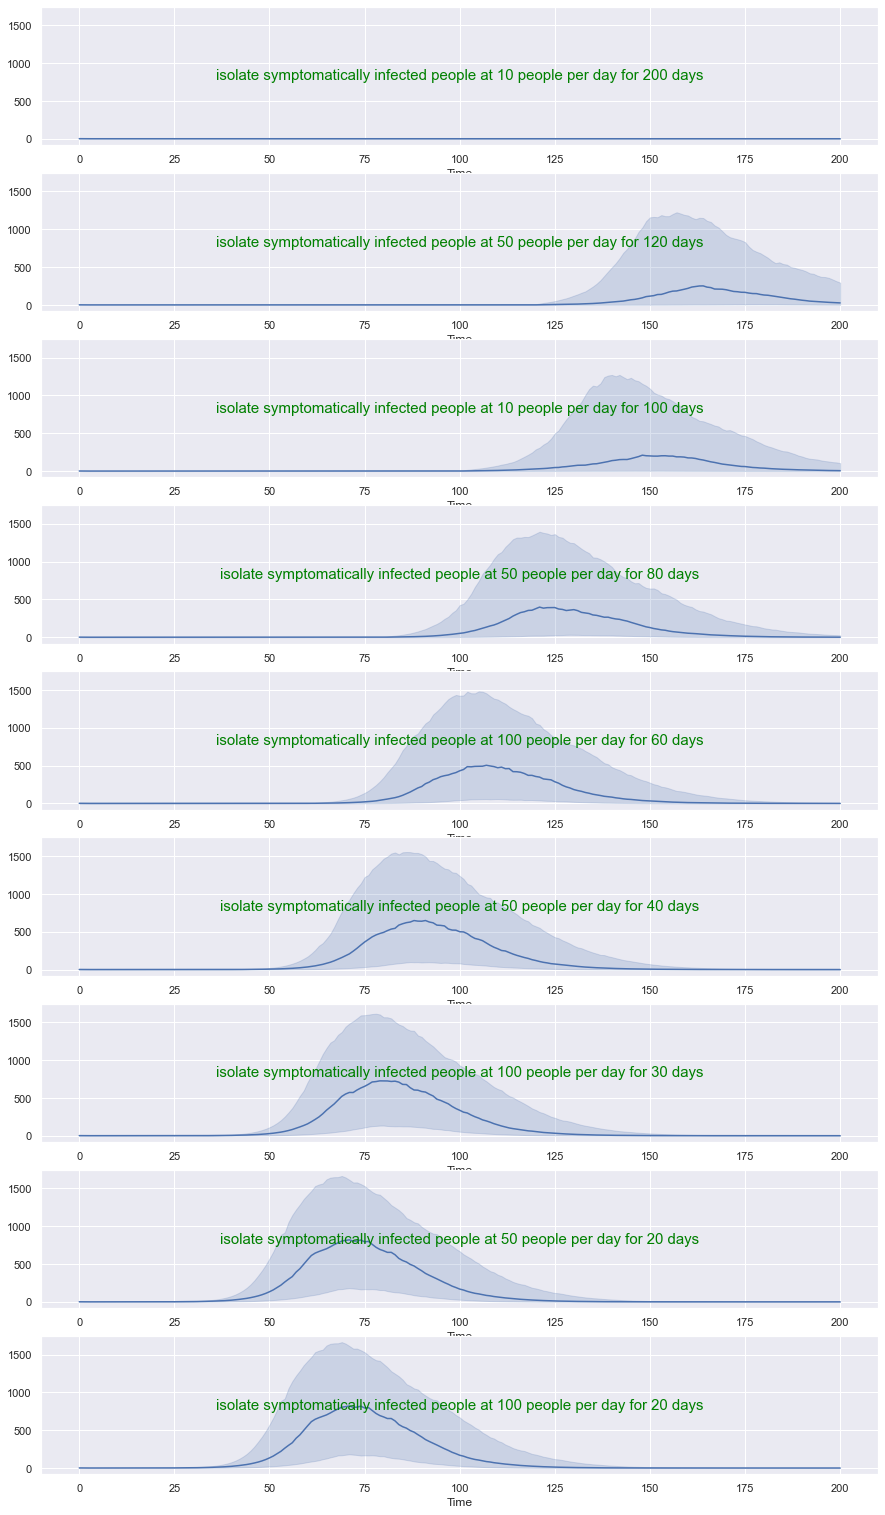

In [5]:
plot_onetype_intervention_vertical('iso','Infected (symptomatic)')

### 2.1.3 Build up ICU bed capacity

Increase in ICU capacity can only reduce the number of deaths by 8-10% and it doesn't really help anymore after scaling the capacity to 24 because the critical care demand is not that high from the camp.

In [4]:
effectiveness_cum_table_onetype(baseline,'icu',caption='Reduction in cumulative incidences for scaling up ICU capacity to different extents')

,increase ICU capacity from 6 to 12,increase ICU capacity from 6 to 24,increase ICU capacity from 6 to 48
Total,,,
Symptomatic Cases,0%~0%,0%~0%,0%~0%
Hospital Person-Days,-2%~-2%,-4%~-3%,-4%~-3%
Critical Person-days,-40%~-38%,-66%~-57%,-66%~-57%
Deaths,6%~7%,8%~10%,8%~10%


In [5]:
effectiveness_peak_table_onetype(baseline,'icu',caption='Delay and reduction in peak prevalence for scaling up ICU capacity to different extents')

TypeError: effectiveness_peak_table_onetype() got an unexpected keyword argument 'caption'

(Thre reduction in Hospital/Critical Person-days and Hospitaliastion/Critical Care demand are negative because the cases actually go up in those cases due to the increase in capacity so now patients will spend more time in those two comparments which dramatically decrease their likelihood of dying)

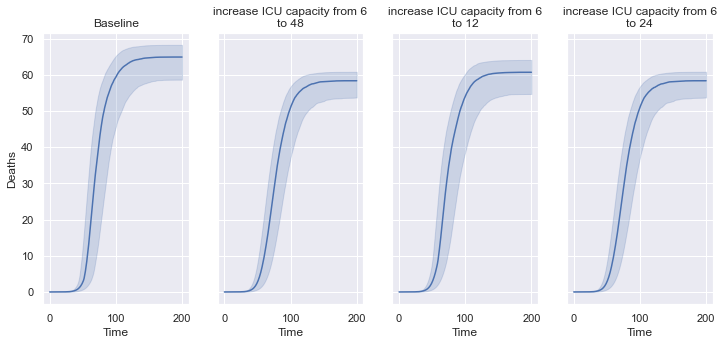

In [12]:
plot_onetype_intervention_horizontal(baseline,'icu','Deaths')

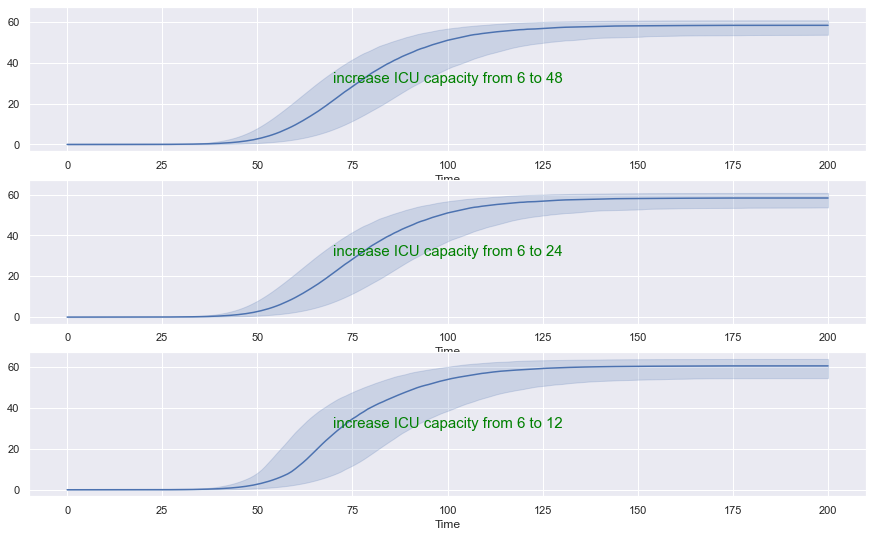

In [13]:
plot_onetype_intervention_vertical('icu','Deaths')

### 2.1.4 Shielding

NB: we are still experimenting with this feature as the in-group contacts are very high which end up exacerbating the epidemic.

In [32]:
effectiveness_cum_table_onetype(baseline,'shielding')

,shielding
Total,
Symptomatic Cases,-13%~-4%
Hospital Person-Days,-10%~-7%
Critical Person-days,5%~8%
Deaths,-17%~-6%


In [33]:
effectiveness_peak_table_shielding(baseline)

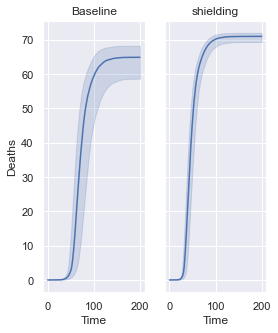

In [14]:
plot_onetype_intervention_horizontal(baseline,'shielding','Deaths')

In [35]:
#distill each predominant feature from each intervention to design something that can have the best impact

In [15]:
plot_intervention_comparison_interactive(plot_intervention_comparison,baseline)

### 2.2 Onto designing multi-intervention strategies

A version of intervention could be:

Invest in a prolonged programme in improving personal hygiene for the camp residents in the whole duration of the pandemic

Move high risk residents swiftly off the island at the very start of the epidemic

Ask the residents who are infected to minimise their contacts and movement and make sure they have access to the necessary treatment (including ICU bed on the island if need be)


(draft conclusion) Here we explore the effect of a single intervention and the combination of one,two,three,four or even five interventions altogether. It should become clear that though some interventions are more effective than others in driving down peak counts, a combination of effective intervention strategy is the best

In [4]:
effectiveness_cum_table_custom(baseline,caption='Custom intervention pathway demonstration',display=False)

,hygieneisohighrisk
Total,
Symptomatic Cases,9%~58%
Hospital Person-Days,31%~85%
Critical Person-days,15%~87%
Deaths,35%~93%


In [6]:
plot_intervention_comparison_interactive(plot_intervention_comparison,baseline,folder_path='./model_outcomes/custom/')